In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **Basic Information of Data**

In [3]:
print(titanic.shape)
print(titanic.columns)

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [5]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### **Summary Statistics**

In [4]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### **Check Missing and Duplicate Values**

In [6]:
print(titanic.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
print(titanic.duplicated().sum())
titanic.drop_duplicates(inplace=True)
print(titanic.duplicated().sum())
print(titanic.shape)


107
0
(784, 15)


## **Analysis and Visualization**

sex
female    293
male      491
Name: sex, dtype: int64


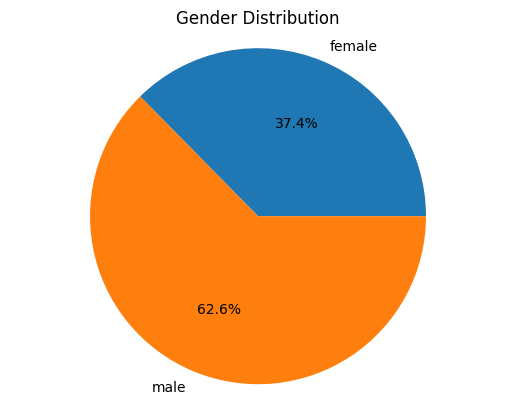

In [8]:
# graph of gender distibution
gender= titanic.groupby('sex')['sex'].count()
print(gender)

plt.pie(gender, labels=gender.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Gender Distribution")
plt.show()

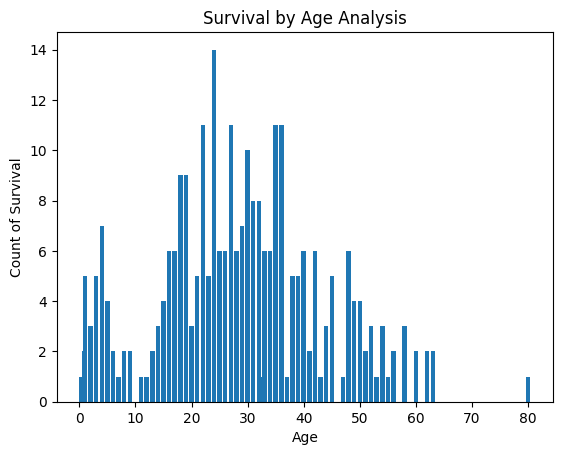

In [9]:
# Age and survival
age_tit = titanic[titanic['age'].notna()] # dataset where there is no blank age, Not removing missing ones because that data wil help in gender survival analysis
age_sur = age_tit.groupby('age')['survived'].sum()

plt.bar(age_sur.index,age_sur.values)
plt.title('Survival by Age Analysis')
plt.xlabel('Age')
plt.ylabel('Count of Survival')
plt.show()

In [10]:
titanic = titanic.rename(columns={'who': 'age_group'})

age_group
child     48
man       85
woman    190
Name: survived, dtype: int64


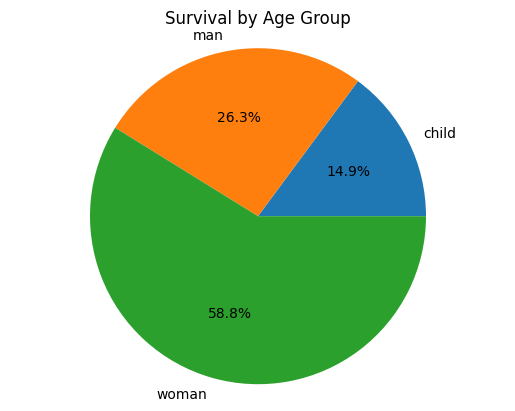

In [11]:
# age group and survival
gen_sur = titanic.groupby('age_group')['survived'].sum()
print(gen_sur)

plt.pie(gen_sur, labels=gen_sur.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Survival by Age Group")
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10084\4250645959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_sur = titanic.groupby('class')['survived'].sum()


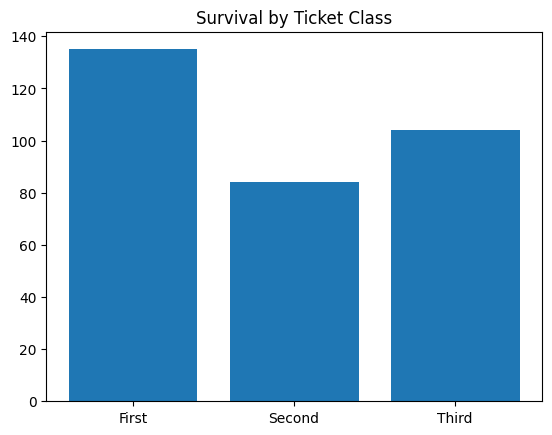

In [15]:
# ticket class and survival
class_sur = titanic.groupby('class')['survived'].sum()
plt.bar(class_sur.index,class_sur.values)
plt.title('Survival by Ticket Class')
plt.show()

alone
False    173
True     150
Name: survived, dtype: int64


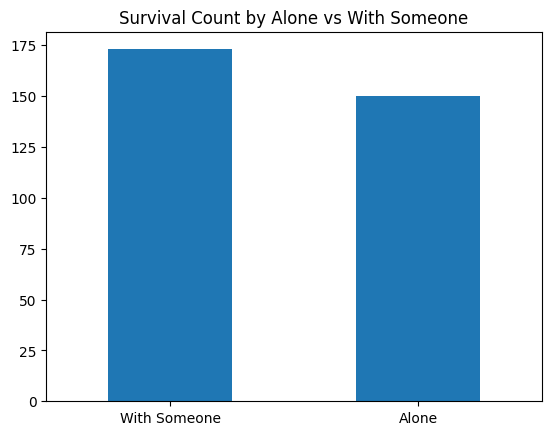

In [14]:
#alone and survival
alone_sur = titanic.groupby('alone')['survived'].sum()
print(alone_sur)
alone_sur.plot(kind='bar',rot=0)
plt.title('Survival Count by Alone vs With Someone')
plt.xlabel('')
plt.xticks([0,1],['With Someone','Alone'])
plt.show()